In [7]:
import matplotlib.pyplot as plt
import numpy as np

beta = lambda  init : (init["c0"] * init["alpha"]) / (init["c1"] + init["alpha"])
theta = lambda init : init["c2"] / init["alpha"]
R0 = lambda init : (beta(init) * init["N0"]) / (init["alpha"] + init["d"] + theta(init))
AlphaMax = lambda init : init["alpha"][np.argmax(R0(init))]
vaccination = lambda init, v : init["alpha"] * (1-v)


alphaMax = 39.10303434478159
R0 = 6.6664430802007715


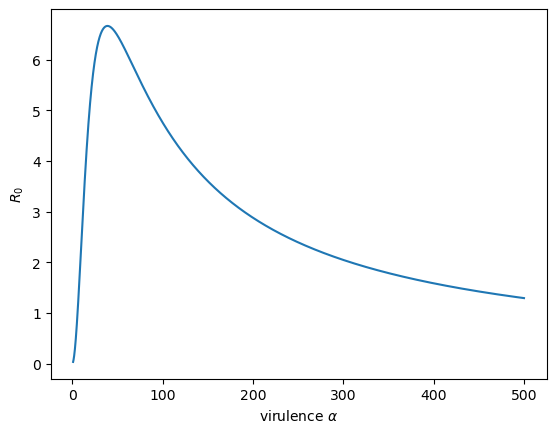

In [12]:
init = dict( d=1/60, c0=70 ,c1=40,c2=500,N0 = 10)

init["alpha"] = np.linspace(1,500,3000)
R0_values = R0(init)

fig, ax = plt.subplots()
ax.plot(init["alpha"],R0_values)
ax.set(xlabel="virulence $\\alpha$" , ylabel="$R_0$")
plt.savefig("../../plots/T2/Plot1.png")
print("alphaMax = " + str(init["alpha"][np.argmax(R0_values)]))
print("R0 = " + str(R0_values[np.argmax(R0_values)]))

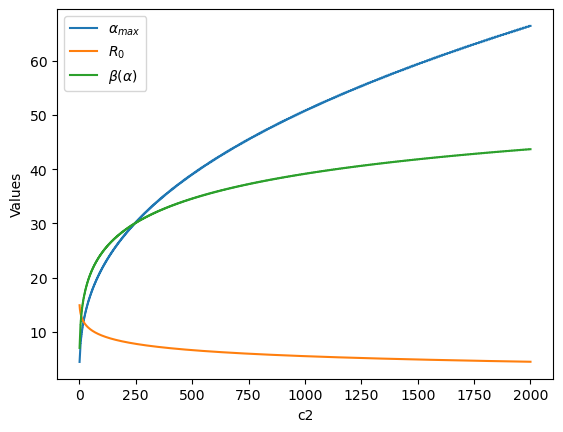

In [14]:
y = [[],[],[]]
c2_values = np.linspace(1,2000,10000)
for c2 in c2_values:
    init["c2"] = c2
    init["alpha"] = np.linspace(1,500,3000)
    a =init["alpha"]= AlphaMax(init)
    y[0].append(a)
    y[1].append(R0(init))
    y[2].append(beta(init))

fig2, ax2 = plt.subplots()
ax2.plot(c2_values,y[0], label="$\\alpha_{max}$")
ax2.plot(c2_values, y[1], label = "$R_0$")
ax2.plot(c2_values, y[2], label="$\\beta (\\alpha)$")
ax2.set(xlabel="c2", ylabel ="Values")
ax2.legend()
plt.savefig("../../plots/T2/Plot2.png")

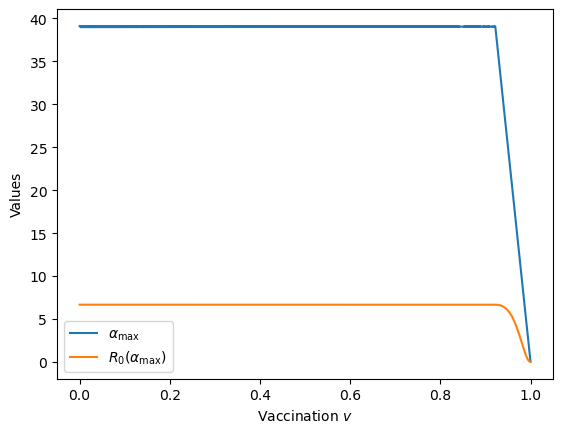

In [24]:
init = dict( d=1/60, c0=70 ,c1=40,c2=500,N0 = 10)

v_values = np.linspace(0,0.9999,10000)

y5 = [] #AlphaMax
y6 = [] #R0
a = np.linspace(1,500,3000)

for v in v_values:
    init["alpha"] = np.linspace(1,500,3000)
    init["alpha"] = vaccination(init, v)
    #amax = init["alpha"]= a[np.argmax(R0(init))]
    amax = init["alpha"]= AlphaMax(init)
    y5.append(amax)
    y6.append(R0(init))


# Plot AlphaMax
fig3, ax3 = plt.subplots()
ax3.plot(v_values,y5, label="$\\alpha_{\\max}$")
ax3.plot(v_values,y6, label="$R_0(\\alpha_{\\max})$")
ax3.set(xlabel = "Vaccination $v$", ylabel="Values")
ax3.legend()
plt.savefig("../../plots/T2/Plot3.png")


0.016666666666666666